<div style="text-align: center; border: 1px solid black;">
    <div style="display: inline-flex; justify-content: center; align-items: center; ">
        <img src="https://www.di.ubi.pt/~rcampos/assets/img/ubi.jpg" alt="First Image" style="margin: 10px;"/>
        <img src="https://www.di.ubi.pt/~rcampos/assets/img/DI_FE.jpg" alt="Second Image" style="margin: 10px;"/>
    </div>
</div>

# *Informação Básica*

Alunos da Universidade da Beira Interior, Francisco Sousa (Nº53642), Inês Alves (Nº55182), cujos ID's no GitHub são Francisco612 e inestalves correspondente, responsáveis pela criação de um projeto no GitHub com o título de trabalho_elementos, e o seu correspondente repositório 
https://github.com/Francisco612/trabalho_elementos.

# *Recolha de Dados*

Para este trabalho, explorámos o portal da **Pordata** com o objetivo de encontrar relações entre as estatísticas sobre Portugal. Após analisarmos vários estatisticas tentando perceber quais poderiam apresentar uma relação entre si, decidimos focar-nos em dois temas muito relevantes e de nosso interesse:

* A taxa de retenção e desistência no ensino secundário por modalidade de ensino.
* O desemprego registado nos centros de emprego por grupo etário

O nosso objetivo foi perceber:
* Se a educação secundária é o fator decisivo para conseguir emprego.
* Se existe uma correlação entre os municípios com maior abandono escolar e maior taxa de desemprego entre os jovens.

# *Integração de Dados*

Nesta fase, procedemos à **integração dos dados recolhidos** num único ficheiro, estruturado em formato tabular. Para garantir compatibilidade e análise eficiente, a tabela foi organizada com as seguintes colunas:

* **Ano**
* **Território** (resultante da fusão entre o nome da região e o âmbito geográfico, conforme solicitado no enunciado)
* **Modalidade de ensino**
* **Taxa de desistência no secundário**, para todos os anos de escolaridade
* **Desemprego registado nos centros de emprego**, para o grupo etário dos **<25 anos**

  
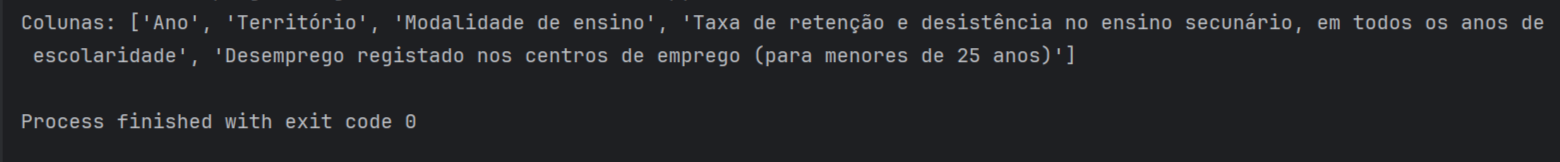

### (1.) Decisões tomadas:

* **Foco nos jovens (<25 anos)**, por ser a faixa etária mais associada à saída recente do ensino secundário.
* **Análise de todas as modalidades de ensino secundário**, com o intuito de perceber quais apresentam maiores taxas de desistência e quais têm menor impacto no desemprego juvenil — podendo assim ser consideradas mais “valiosas” mesmo sem diploma.
* **Ano inicial escolhido: 2009**, pois foi a partir deste ano que os dados começaram a estar disponíveis por município, o que permite uma análise geográfica mais detalhada.

### (2.) Processamento dos Dados:

* Foi realizado o **merge entre as colunas "Nome da Região" e "Âmbito Geográfico"** para obter o campo "Território", como especificado.
* Devido à fromatação da base de dados foi necessária uma renumiação de todas as colunas para uma mais fácil análise.
* Foi selecionado o intrevalo de anos de 2009 até 2023
* Optámos por considerar todos os anos de escolaridade, uma vez que não existem dados suficientes que permitam comparar a taxa de desemprego entre diferentes idades.
* Foram ainda eliminadas colunas nulas ou com informação não relevante ao nosso trabalho.
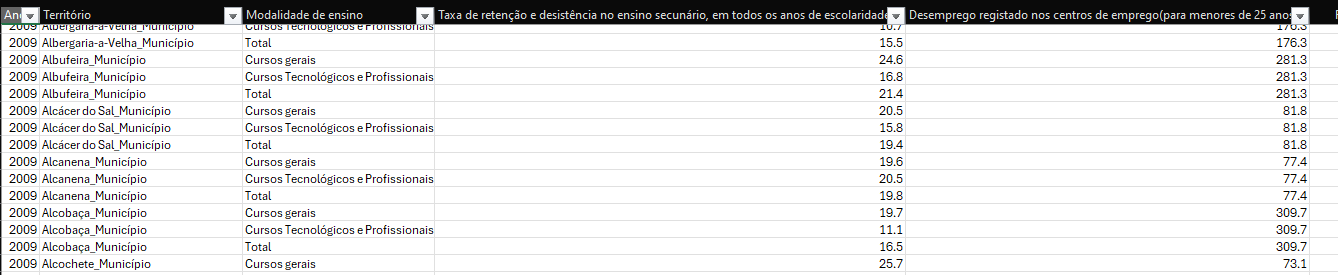



# *Análise Exploratória de Dados*

### (1.) Valores Ausentes

Foram identificados valores ausentes em algumas colunas do conjunto de dados.
Para facilitar a visualização, foi gerado um heatmap:

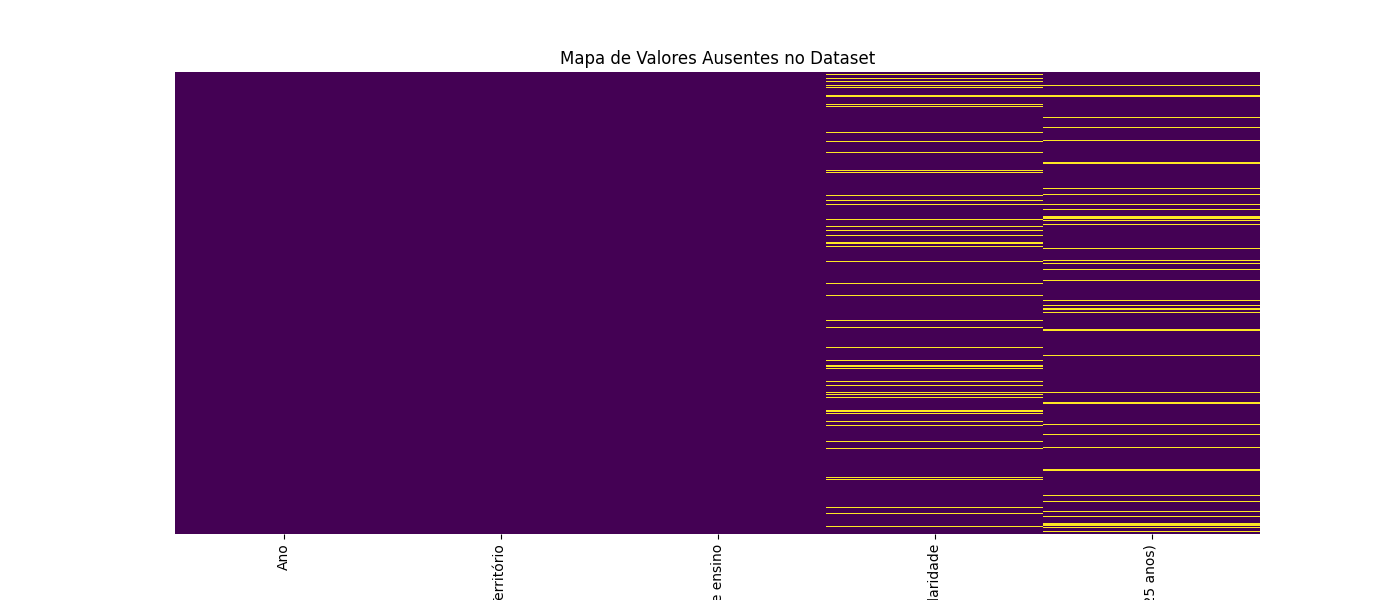

e uma tabela com a contagem e percentuais de valores ausentes por coluna:

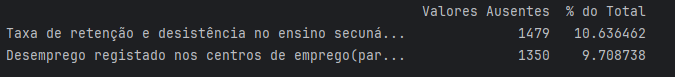

### (2.) Outliers

Outliers foram identificados principalmente nas seguintes variáveis:

Taxa de retenção e desistência no ensino secundário: valores ≥ 37%

Desemprego jovem (< 25 anos): valores ≥ 30%, chegando até 85.4%

A maior concentração desses outliers ocorre no ano de 2009, o que pode refletir realidades socioeconómicas específicas em determinados territórios.

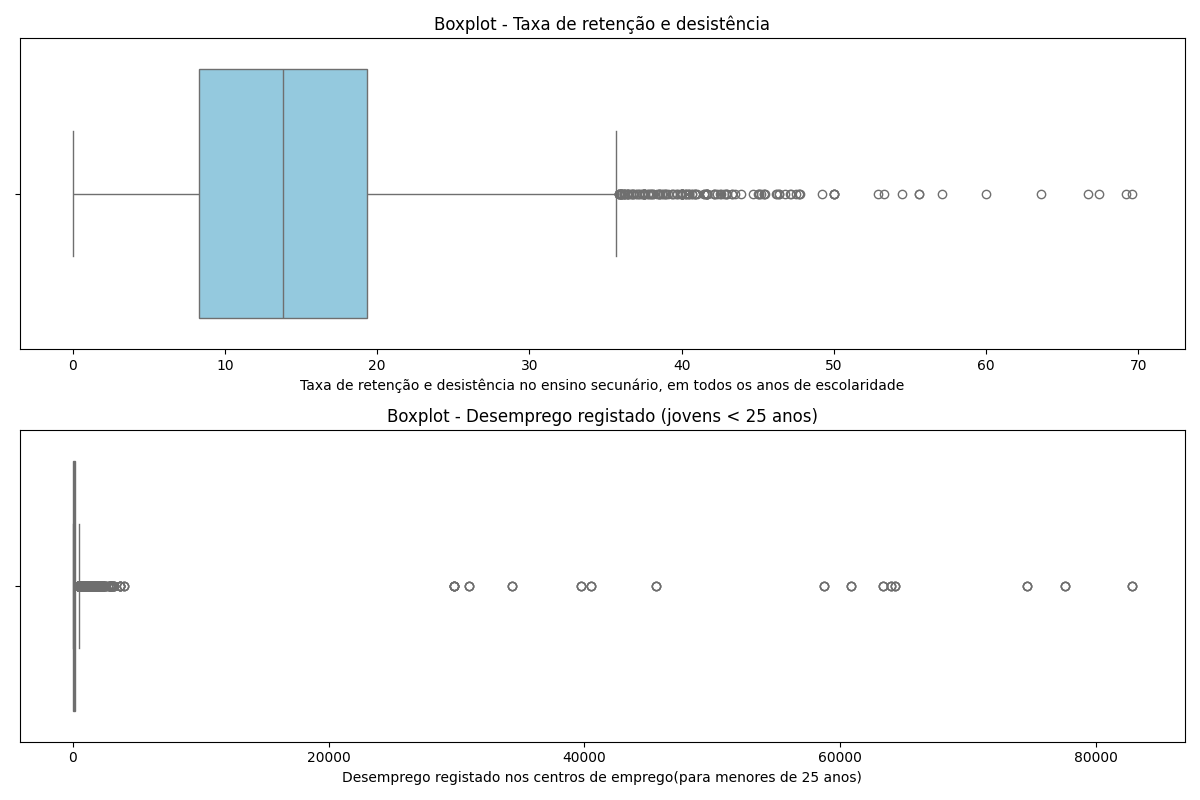

### (3.) Correlação entre Variáveis

Foi gerada uma matriz de correlação entre as variáveis numéricas.
Alguns destaques:

Correlação baixa entre a taxa de desistência e o desemprego jovem:
r ≈ 0.03

Apesar da correlação baixa, a presença simultânea de outliers nas duas variáveis pode indicar fenómenos estruturais, como o abandono escolar associado ao desemprego.


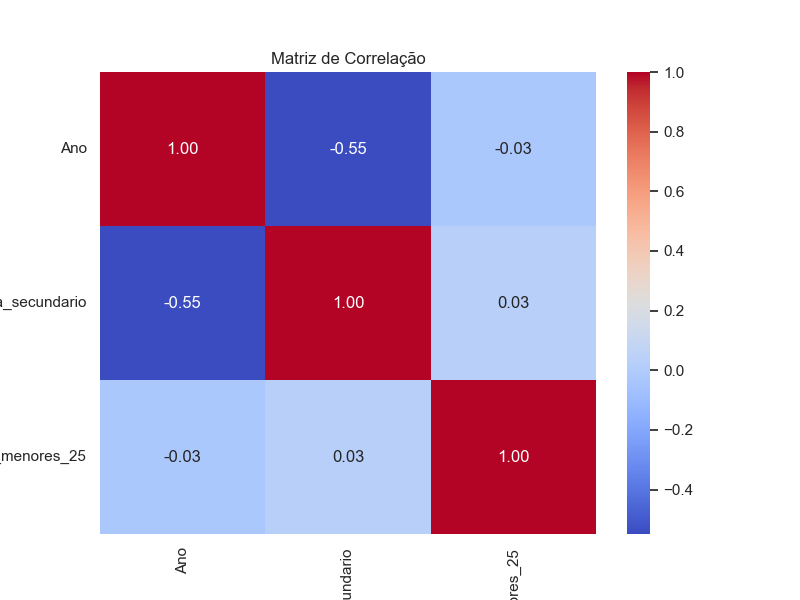

# *Limpeza e Processamento de Dados*

Na parte da limpeza e processamento de dados, os metodos usados foram: limpeza dos valores ausentes e remoção dos outliers. 

Este processo foi possível através da criação de uma função, tanto para valores ausentes (`limpar_valores_ausentes()`) como para outliers(`calculo_outliers(), remover_outliers()`).

Em relação à limpeza de valores ausentes, a função em questão é bastante simples, consistindo apenas na leitura do csv original (`data_final.csv`), remove os valores ausentes desse mesmo csv e retorna os dados em outro csv (`data_final_sem_va.csv`)

--------------------------------------------------------------------------------------------------------------------------------------------------------

**Clicar duas vezes <b>aqui</b> para aceder ao código da função da limpeza de valores ausentes**
<!--
def limpar_valores_ausentes():

    df = pd.read_csv('resultados_csv/data_final.csv', sep=';')
    print("Shape original:", df.shape)
    df_sem_na = df.dropna()
    print("Shape após remoção de valores ausentes:", df_sem_na.shape)
    df_sem_na.to_csv('resultados_csv/data_final_sem_va.csv', index=False)
    return df_sem_na
-->

--------------------------------------------------------------------------------------------------------------------------------------------------------

Para calcular os outliers criamos uma função (`calculo_outliers()`) que segue a seguinte ordem de acontecimentos:

**(1)**- Seleciona apenas colunas númericas do Dataset.

**(2)**- Aplica um dos dois métodos para identificar os outliers (`metodo='zscore' / metodo='iqr'`). Neste projeto ficou predefinido o uso do método iqr.

**(3)**- Retorna um novo DataFrame sem as linhas que contêm os outliers (`data_final_limpo.csv`)

--------------------------------------------------------------------------------------------------------------------------------------------------------

**Clicar duas vezes <b>aqui</b> para aceder ao código da função de calculo de outliers**
<!--
def calculo_outliers(df, metodo='iqr', threshold=3):
    df_numeric = df.select_dtypes(include=[np.number])

    if metodo == 'zscore':
        z_scores = np.abs((df_numeric - df_numeric.mean()) / df_numeric.std())
        mask = (z_scores < threshold).all(axis=1)
    elif metodo == 'iqr':
        Q1 = df_numeric.quantile(0.25)
        Q3 = df_numeric.quantile(0.75)
        IQR = Q3 - Q1
        mask = ~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)
    else:
        raise ValueError("Método deve ser 'zscore' ou 'iqr'.")

    return df[mask]
-->

--------------------------------------------------------------------------------------------------------------------------------------------------------

Foi posta em cima da mesa a possibilidade de preencher os valores ausentes com a mediana, mas depois de pensarmos mais no assunto optamos por retirar do csv todas as linhas que continham valores ausentes. Vimos esta opção como melhor solução porque, ao analisar a percentagem de valores ausentes em cada uma das variáveis (inferiores a 11% dos dados no total) percebemos que ao retirar estes dados conseguiamos ter ainda uma grande quantidade de dados para analisar.

No processamento de dados, a remoção de outliers e o tratamento de valores em falta são etapas fundamentais para garantir a qualidade e a confiabilidade das análises. Outliers são dados que se desviam significativamente dos padrões esperados, podendo distorcer resultados e influenciar negativamente modelos estatísticos e de machine learning. Já os valores em falta representam ausência de dados em determinadas observações, o que pode comprometer a integridade do conjunto de dados.
A correta aplicação dessas técnicas melhora a qualidade dos dados, tornando os resultados das análises mais precisos e confiáveis.

# *Análise Descritiva*

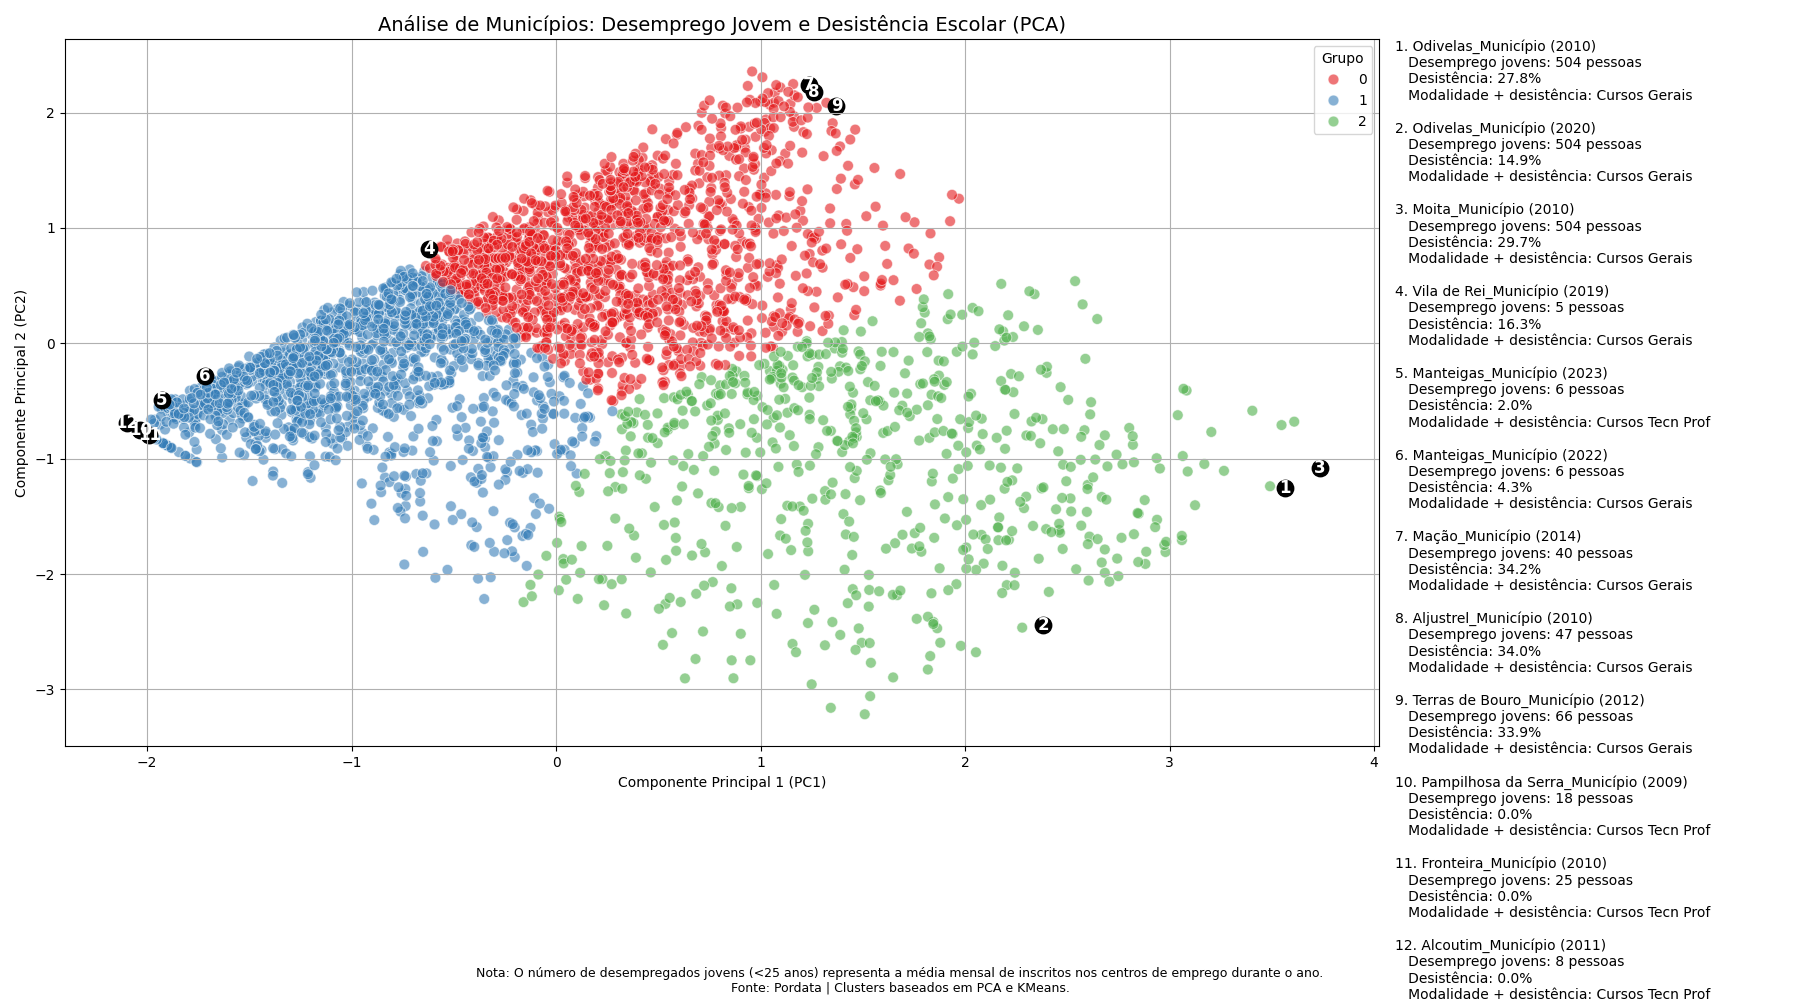

O gráfico apresenta uma análise de agrupamento (clustering) dos municípios portugueses com base em dois indicadores principais: desemprego jovem e desistência escolar. A técnica utilizada para a redução de dimensionalidade foi a `Análise de Componentes Principais (PCA)`, e os agrupamentos foram realizados com o algoritmo `K-Means`, resultando em três grupos distintos representados pelas cores azul (Grupo 0), vermelho (Grupo 1) e verde (Grupo 2).

### Principais Observações:

**Grupo 0 (Azul):**

Compreende municípios com baixos níveis de desemprego jovem e baixa desistência escolar.

`Exemplo`: Manteigas (2023 e 2022), Vila de Rei (2019) e Fronteira (2010), com valores muito baixos nos dois indicadores.

Predomina a oferta de Cursos Profissionais ou Tecnológicos, o que pode estar associado a melhores resultados em retenção escolar e empregabilidade.

**Grupo 1 (Vermelho):**

Inclui municípios com níveis moderados a altos de desemprego jovem e/ou desistência escolar.

`Exemplo`: Odivelas (2010), Mação (2014) e Aljustrel (2010), com taxas de desistência `acima de 30%` e um número elevado de jovens desempregados.

Há uma forte presença de Cursos Gerais, sugerindo uma possível associação entre essa modalidade e resultados educacionais e laborais menos favoráveis.

**Grupo 2 (Verde):**

Representa municípios com níveis mais elevados de desemprego jovem, mesmo quando a desistência escolar é variável.

`Exemplo`: Moita (2010) com 29,7% de desistência e 504 jovens desempregados, reforçando a presença em um cluster de risco.

A dispersão do grupo indica que há uma maior heterogeneidade nos indicadores neste segmento.

**Destaques Individuais:**

Odivelas (2010 vs 2020) mostra um caso interessante de `evolução positiva`, mantendo o mesmo número de jovens desempregados mas reduzindo drasticamente a taxa de desistência `(de 27,8% para 14,9%)`.

Municípios como `Pamplihosa da Serra (2009) e Alcoutim (2011)` destacam-se por `taxas nulas de desistência`, mesmo com algum desemprego jovem, o que pode indicar boas práticas educativas.